In [1]:
import numpy as np

In [2]:
input_vector = [1.72, 1.23]
weights_1 = [1.26, 0]
weights_2 = [2.17, 0.32]

In [3]:
# Computing the dot product of input_vector and weights_1
first_indexes_mult = input_vector[0] * weights_1[0]
second_indexes_mult = input_vector[1] * weights_1[1]
dot_product_1 = first_indexes_mult + second_indexes_mult

In [4]:
print(f"The dot product is: {dot_product_1}")

The dot product is: 2.1672


#### sigmoid function
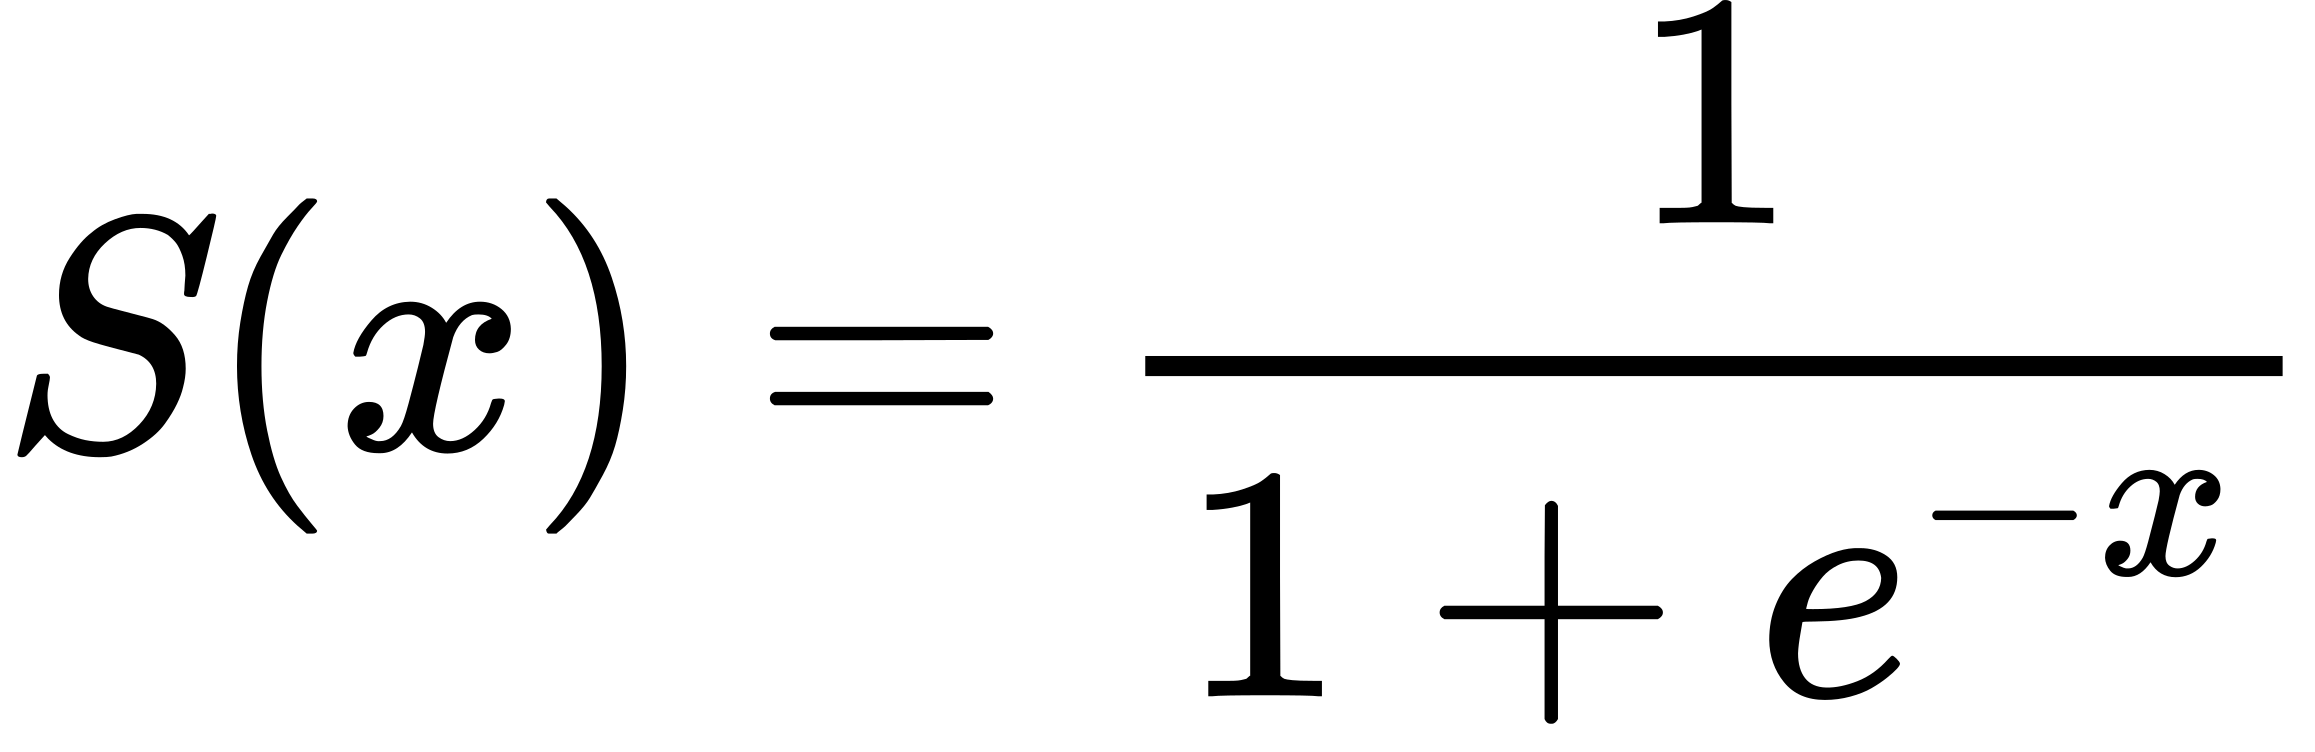

In [5]:
# Wrapping the vectors in NumPy arrays
input_vector = np.array([1.66, 1.56])
weights_1 = np.array([1.45, -0.66])
bias = np.array([0.0])

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [7]:
input_vector2= np.array([2, 1.5])

In [8]:

def make_prediction(input_vector2, weights, bias):
     layer_1 = np.dot(input_vector2, weights) + bias
     layer_2 = sigmoid(layer_1)
     return layer_2

In [9]:

#def make_prediction(input_vector, weights, bias):
     #layer_1 = np.dot(input_vector, weights) + bias
     #layer_2 = sigmoid(layer_1)
     #return layer_2

In [10]:

#prediction = make_prediction(input_vector, weights_1, bias)

#print(f"The prediction result is: {prediction}")
#The raw prediction result is 0.79, which is higher than 0.5, so the output is 1. The network made a correct prediction

In [11]:

prediction = make_prediction(input_vector2, weights_1, bias)

print(f"The prediction result is: {prediction}")
# The correct result for this input is 0.

The prediction result is: [0.87101915]


In [12]:
#This time, the network made a wrong prediction. The result should be less than 0.5 since the target for this input is 0, but the raw result was 0.87.

#### Computing the Prediction Error

To understand the magnitude of the error, we use the mean squared error (MSE) as the cost function. we compute the MSE in two steps:

1.Compute the difference between the prediction and the target.
2.Multiply the result by itself.

In [13]:
target = 0

mse = np.square(prediction - target)

print(f"Prediction: {prediction}; Error: {mse}")


Prediction: [0.87101915]; Error: [0.75867436]


In [14]:
#One implication of multiplying the difference by itself is that bigger errors have an even larger impact, and smaller errors keep getting smaller as they decrease.

##### The goal is to change the weights and bias variables so you can reduce the error.

In [15]:
#we’ll change only the weights variable and leave the bias fixed for now.we can also get rid of the sigmoid function and use only the result of layer_1.

In [84]:
#we compute the MSE by doing error = np.square(prediction - target). 

##### If you treat (prediction - target) as a single variable x, then you have error = np.square(x), which is a quadratic function. 

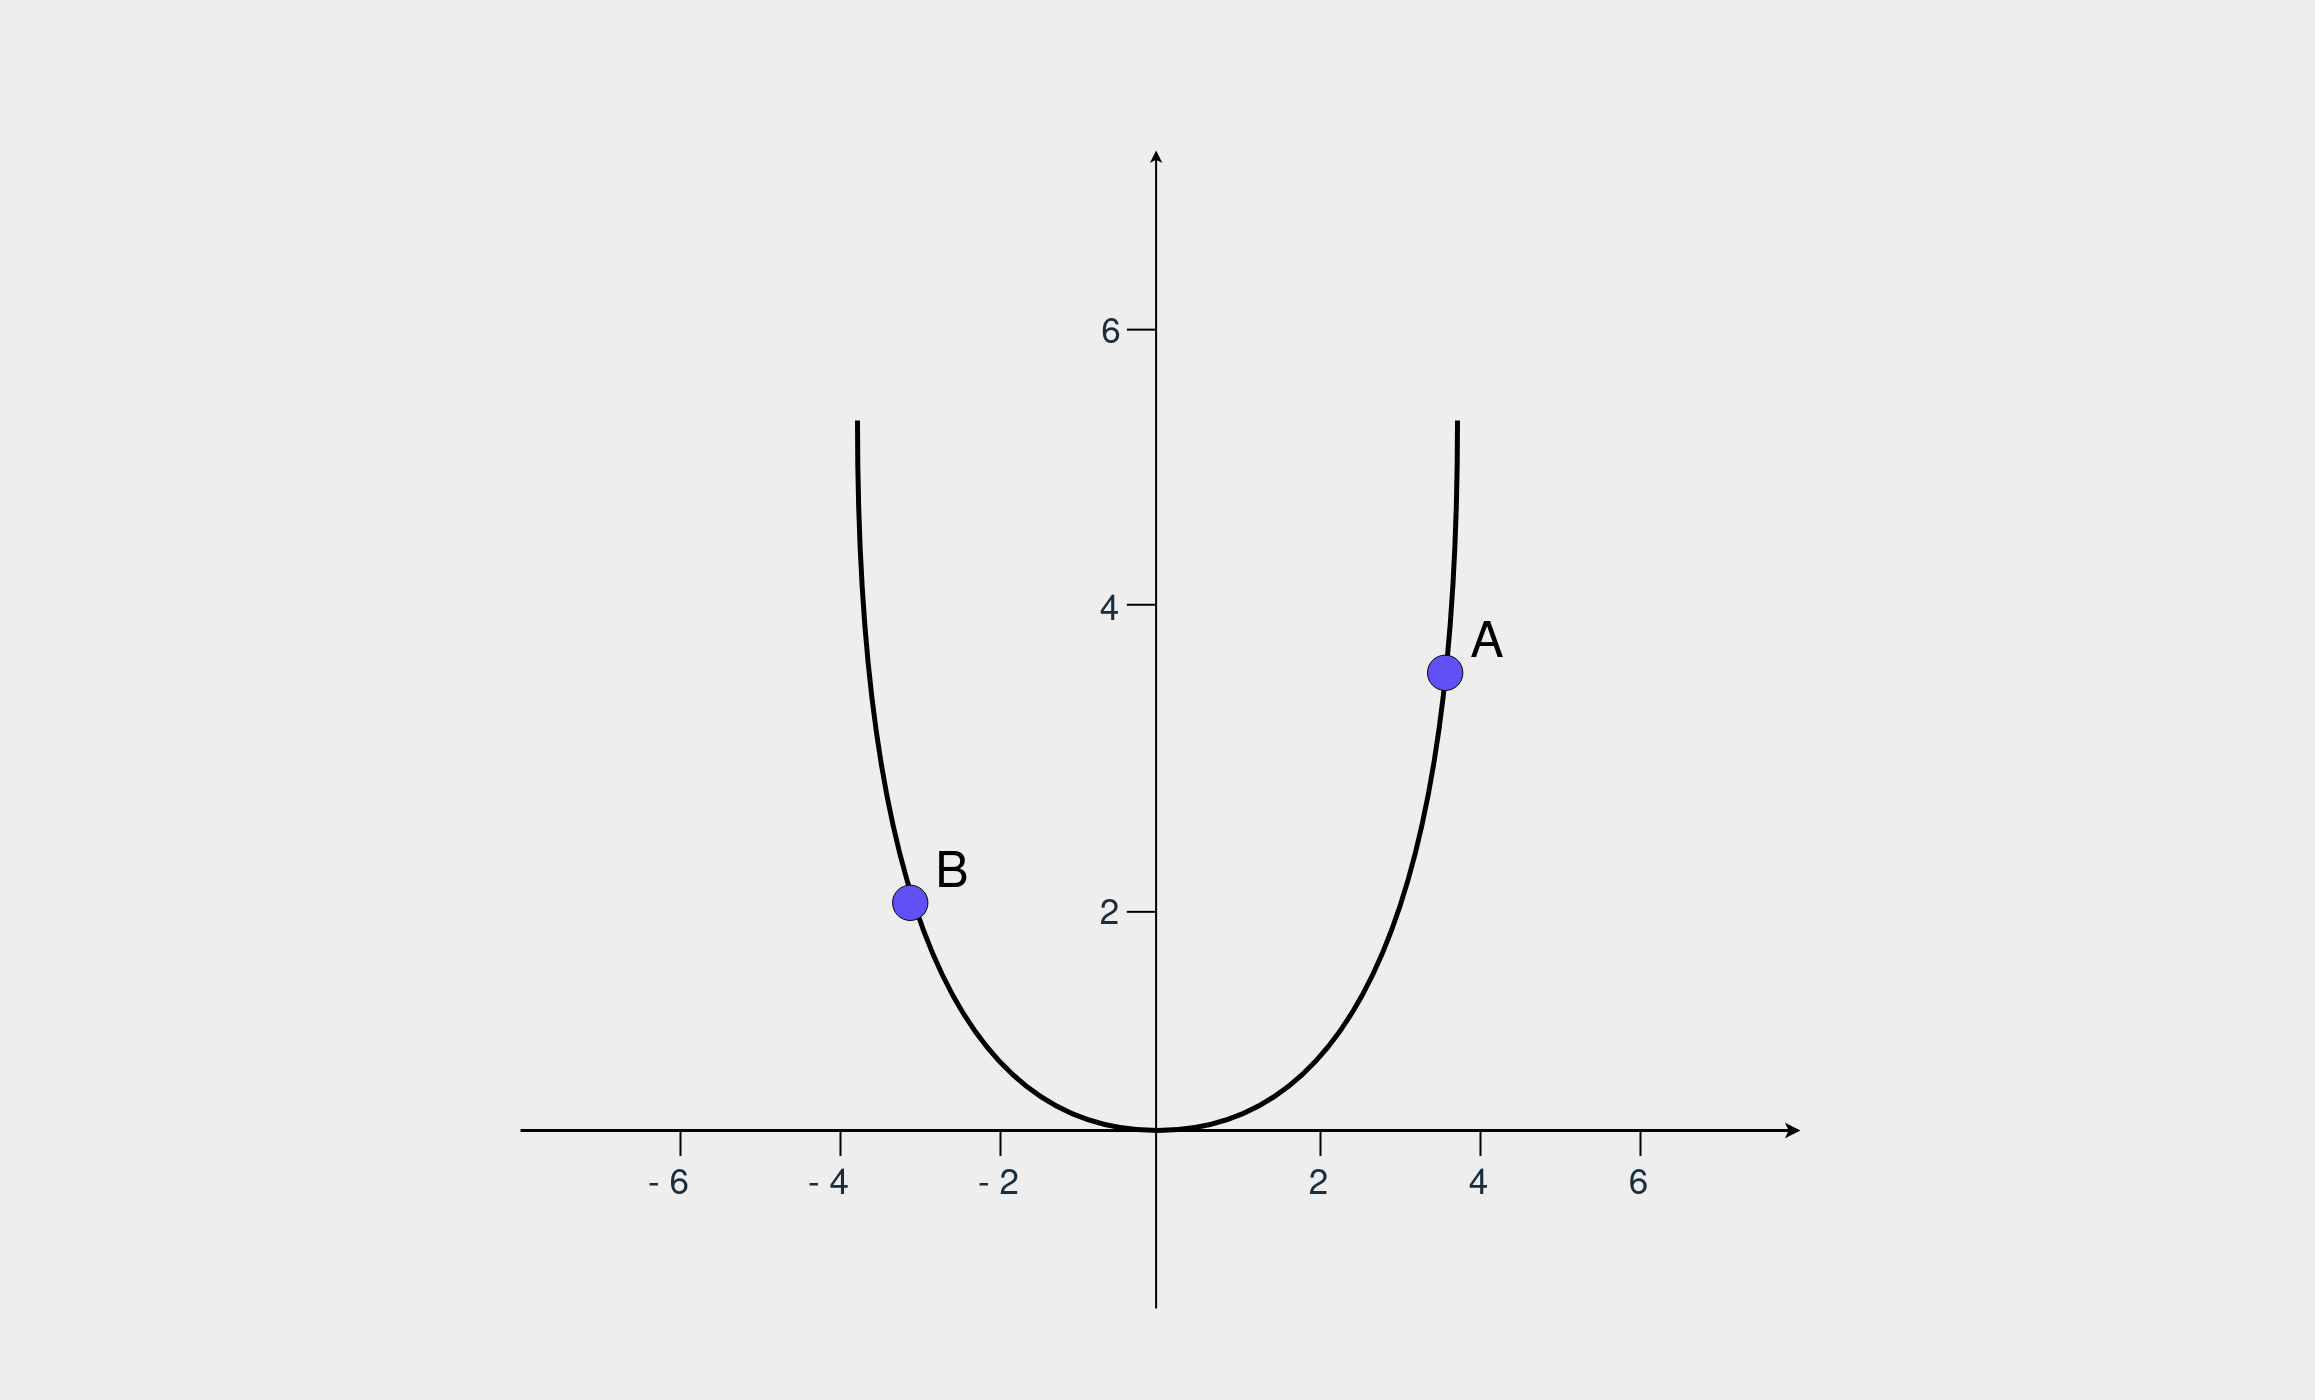

When it comes to white box neural network, the derivative will tell you the direction you should take to update the weights variable. If it’s a positive number, then you predicted too high, and you need to decrease the weights. If it’s a negative number, then you predicted too low, and you need to increase the weights.

In [85]:
derivative = 2 * (prediction - target)

print(f"The derivative is {derivative}")

The derivative is [0.02863185]


In [86]:
#The result is 1.74, a positive number, so we need to decrease the weights. we do that by subtracting the derivative result of the weights vector.

In [87]:
# Updating the weights
weights_1 = weights_1 - derivative

prediction = make_prediction(input_vector, weights_1, bias)

error = (prediction - target) ** 2

print(f"Prediction: {prediction}; Error: {error}")

Prediction: [0.01307157]; Error: [0.00017087]


In [20]:
def sigmoid_deriv(x):
    return sigmoid(x) * (1-sigmoid(x))

derror_dprediction = 2 * (prediction - target)
layer_1 = np.dot(input_vector, weights_1) + bias
dprediction_dlayer1 = sigmoid_deriv(layer_1)
dlayer1_dbias = 1

derror_dbias = (
    derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
)

DESIGNING A NEURAL NETWORK

In [81]:
class NeuralNetwork:
    def __init__ (self, learning_rate):
        self.weights = np.array([np.random.randn(), np.random.randn()])
        self.bias = np.random.randn()
        self.learning_rate = learning_rate

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_deriv(self, x):
        return self._sigmoid(x) * (1 - self._sigmoid(x))

    def predict(self, input_vector):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2
        return prediction

    def _compute_gradients(self, input_vector, target):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2

        derror_dprediction = 2 * (prediction - target)
        dprediction_dlayer1 = self._sigmoid_deriv(layer_1)
        dlayer1_dbias = 1
        dlayer1_dweights = (0 * self.weights) + (1 * input_vector)

        derror_dbias = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
        )
        derror_dweights = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dweights
        )

        return derror_dbias, derror_dweights

    def _update_parameters(self, derror_dbias, derror_dweights):
        self.bias = self.bias - (derror_dbias * self.learning_rate)
        self.weights = self.weights - (
            derror_dweights * self.learning_rate
        )
    def train(self, input_vectors, targets, iterations):
        cumulative_errors = []
        for current_iteration in range(iterations):
            # Pick a data instance at random
            random_data_index = np.random.randint(len(input_vectors))

            input_vector = input_vectors[random_data_index]
            target = targets[random_data_index]

            # Compute the gradients and update the weights
            derror_dbias, derror_dweights = self._compute_gradients(
                input_vector, target
            )

            self._update_parameters(derror_dbias, derror_dweights)

            # Measure the cumulative error for all the instances
            if current_iteration % 100 == 0:
                cumulative_error = 0
                # Loop through all the instances to measure the error
                for data_instance_index in range(len(input_vectors)):
                    data_point = input_vectors[data_instance_index]
                    target = targets[data_instance_index]

                    prediction = self.predict(data_point) #computes the prediction result.
                    error = np.square(prediction - target) #computes the error for every instance.

                    cumulative_error = cumulative_error + error
                cumulative_errors.append(cumulative_error) #where you accumulate the sum of the errors using the cumulative_error variable.

        return cumulative_errors

In [82]:
learning_rate = 0.1

neural_network = NeuralNetwork(learning_rate)

neural_network.predict(input_vector)

0.26398549499262547

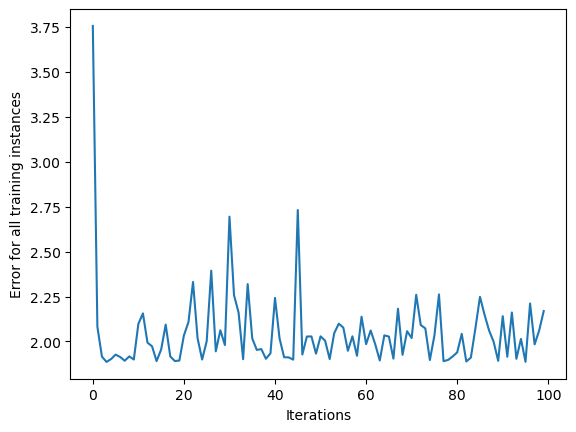

In [83]:

import matplotlib.pyplot as plt

input_vectors = np.array(
    [
        [3, 1.5],
        [2, 1],
        [4, 1.5],
        [3, 4],
        [3.5, 0.5],
        [2, 0.5],
        [5.5, 1],
        [1, 1],
    ]
)

targets = np.array([0, 1, 0, 1, 0, 1, 1, 0])

learning_rate = 0.1

neural_network = NeuralNetwork(learning_rate)

training_error = neural_network.train(input_vectors, targets, 10000)

plt.plot(training_error)
plt.xlabel("Iterations")
plt.ylabel("Error for all training instances")
plt.savefig("cumulative_error.png")